# Fraudcheck data

In [66]:
import pandas as pd
import numpy as np
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud=pd.read_csv("Fraud_check.csv")

In [3]:
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [4]:
fraud.shape

(600, 6)

In [5]:
fraud.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [8]:
fraud = pd.get_dummies(fraud,columns = ['Undergrad','Marital.Status','Urban'],drop_first=True)


In [9]:
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [0,30000,99620], labels = ["Risky", "Good"])


In [10]:
print(fraud)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [11]:
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

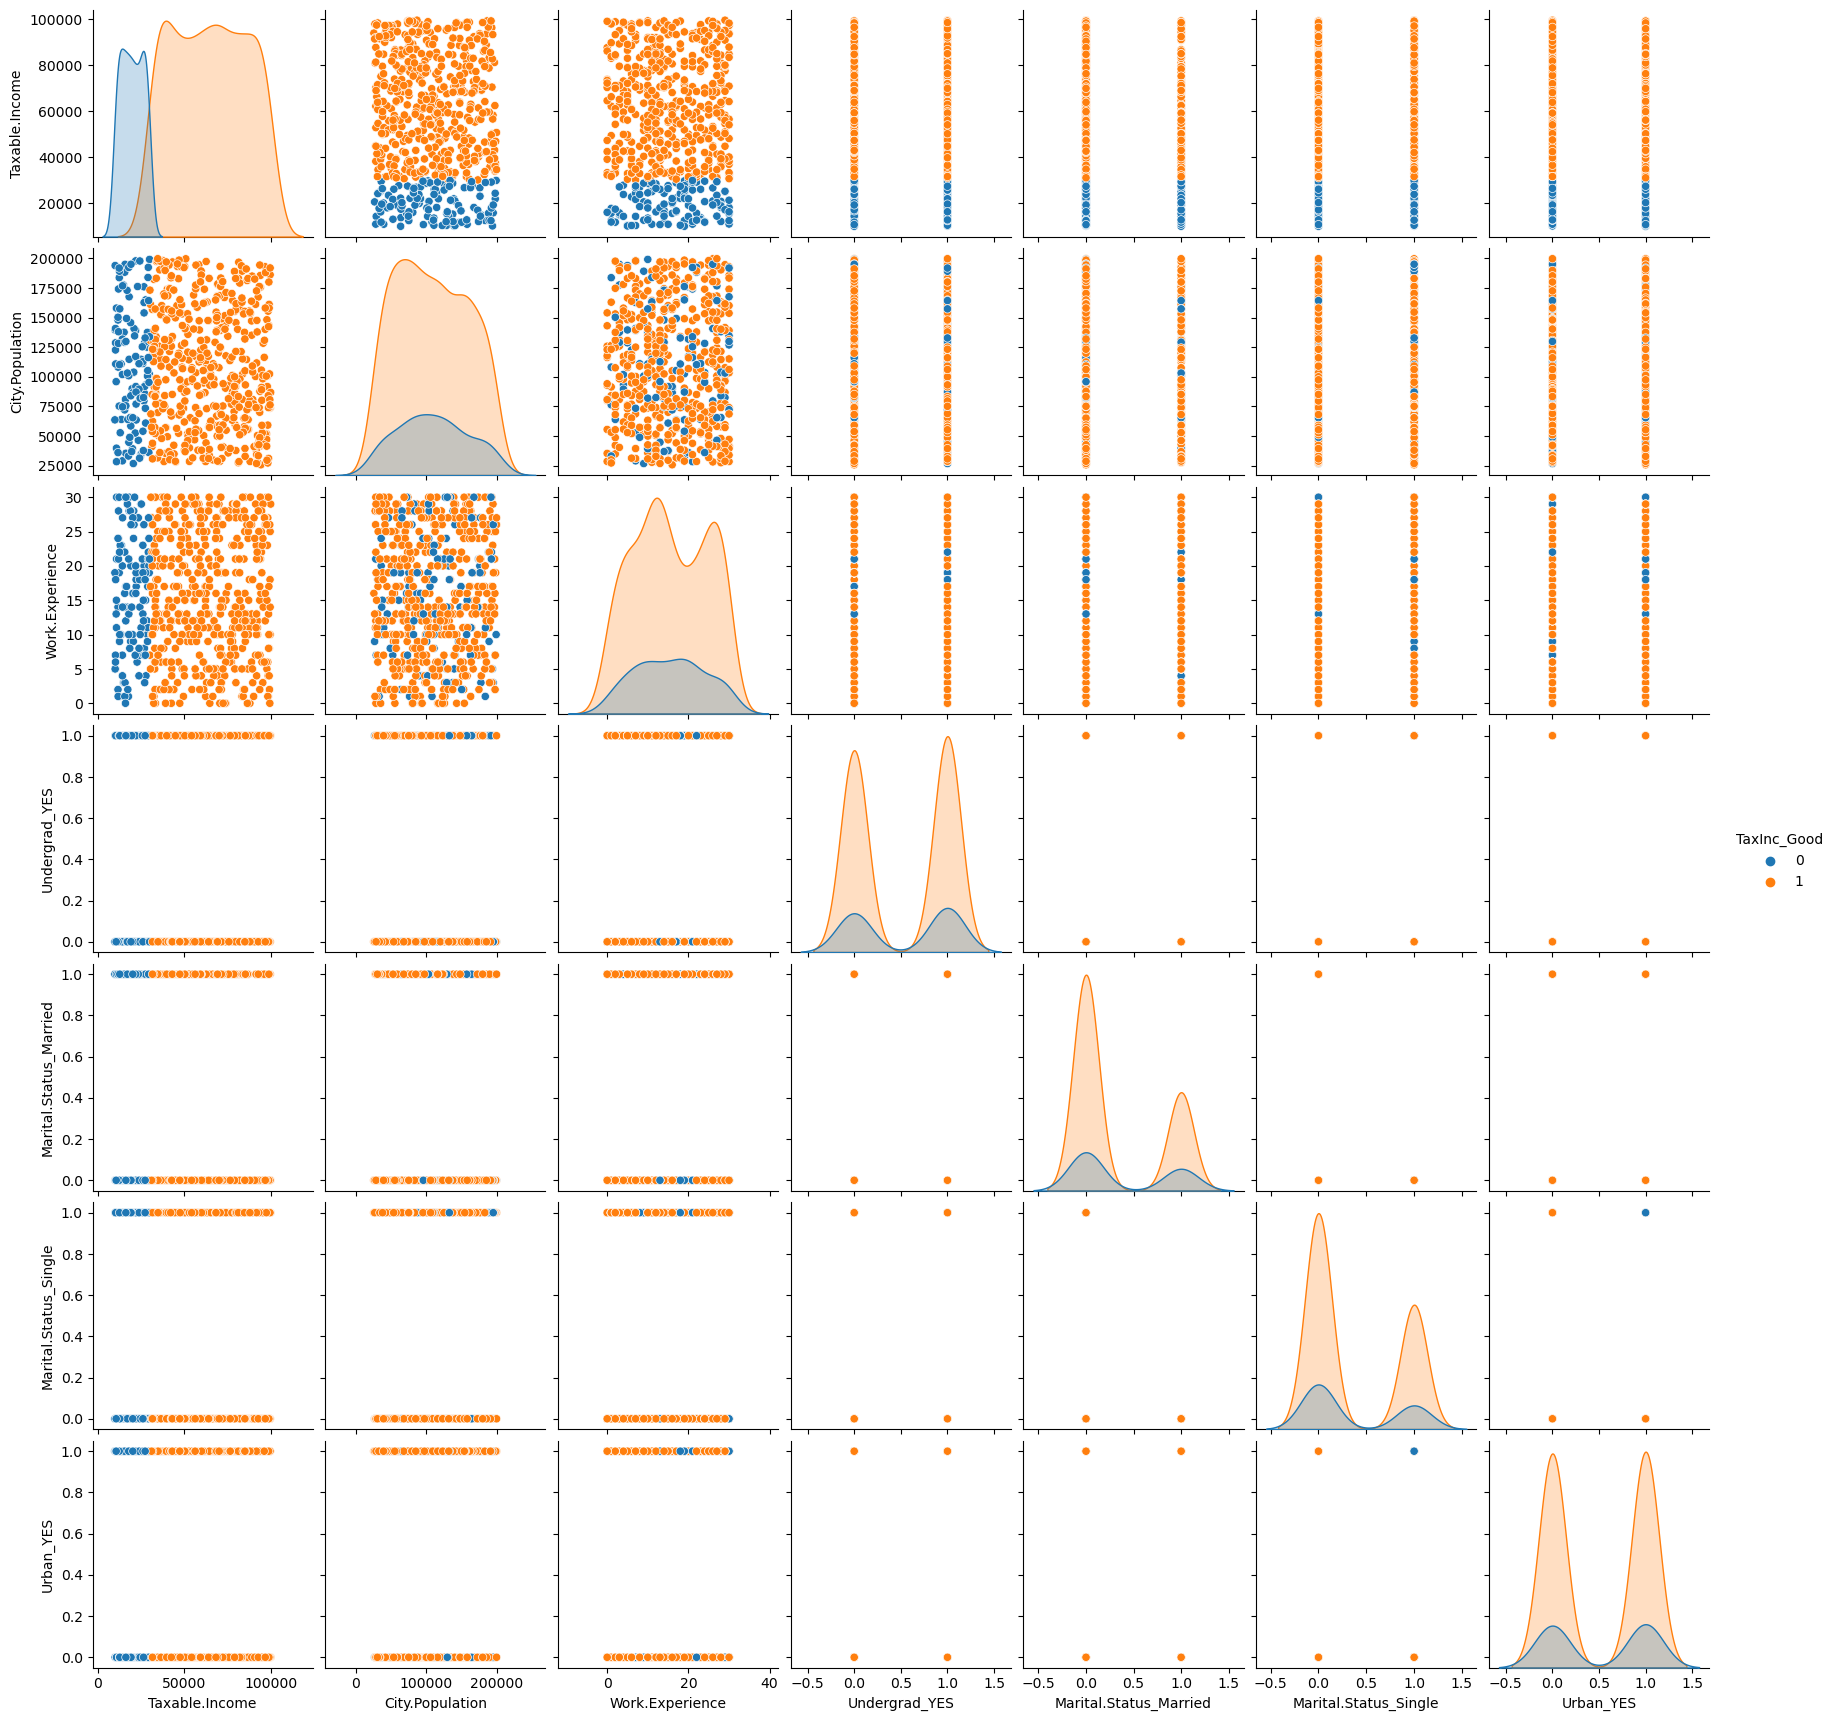

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data=fraud, hue = 'TaxInc_Good')


In [13]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [14]:
fraud_norm = norm_func(fraud.iloc[:,1:])
fraud_norm


City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
0           0.139472         0.333333            0.0                     0.0   
1           0.622394         0.600000            1.0                     0.0   
2           0.772568         1.000000            0.0                     1.0   
3           0.962563         0.500000            1.0                     0.0   
4           0.010081         0.933333            0.0                     1.0   
..               ...              ...            ...                     ...   
595         0.078811         0.233333            1.0                     0.0   
596         0.170058         0.066667            1.0                     0.0   
597         0.737240         0.000000            0.0                     0.0   
598         0.886810         0.566667            1.0                     1.0   
599         0.760683         0.533333            0.0                     0.0   

     Marital.Status_Single  Urban_YES  TaxInc_Good  
0                      1.0        1.0          1.0  
1                      0.0        1.0          1.0  
2                      0.0        1.0          1.0  
3                      1.0        1.0          1.0  
4                      0.0        0.0          1.0  
..                     ...        ...          ...  
595                    0.0        1.0          1.0  
596                    0.0        1.0          1.0  
597                    0.0        1.0          1.0  
598                    0.0        0.0          1.0  
599                    0.0        0.0          1.0  

[600 rows x 7 columns]

In [16]:
X = fraud_norm.drop(['TaxInc_Good'], axis=1)
y = fraud_norm['TaxInc_Good']


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [19]:
fraud_norm["income"]="<=30000"
fraud_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"


In [20]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)


In [21]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [23]:
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]


In [24]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


In [26]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [27]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_


C:\Users\UMAPATHY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [28]:
model.n_outputs_

1

In [29]:
model.oob_score_

0.5229166666666667

In [31]:
prediction = model.predict(x_train)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)


In [33]:
np.mean(prediction == y_train)

0.9791666666666666

In [34]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [35]:
pred_test = model.predict(x_test)

In [36]:
acc_test =accuracy_score(y_test,pred_test)

In [37]:
from sklearn.tree import export_graphviz

In [38]:
!pip install pydotplus

In [39]:
import pydotplus

In [40]:
from six import StringIO

In [41]:
tree = model.estimators_[5]

In [42]:
dot_data = StringIO()

In [43]:
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [45]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())



In [46]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
from sklearn import tree

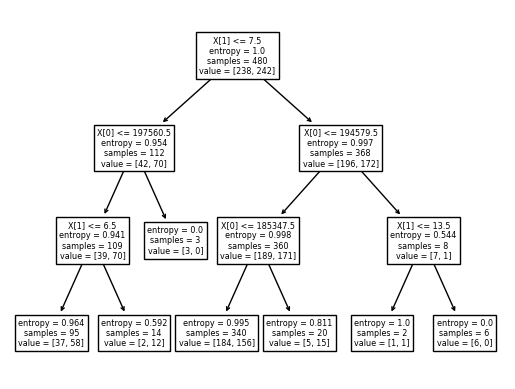

In [50]:
tree.plot_tree(model)
plt.show()

In [51]:
colnames = list(fraud.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

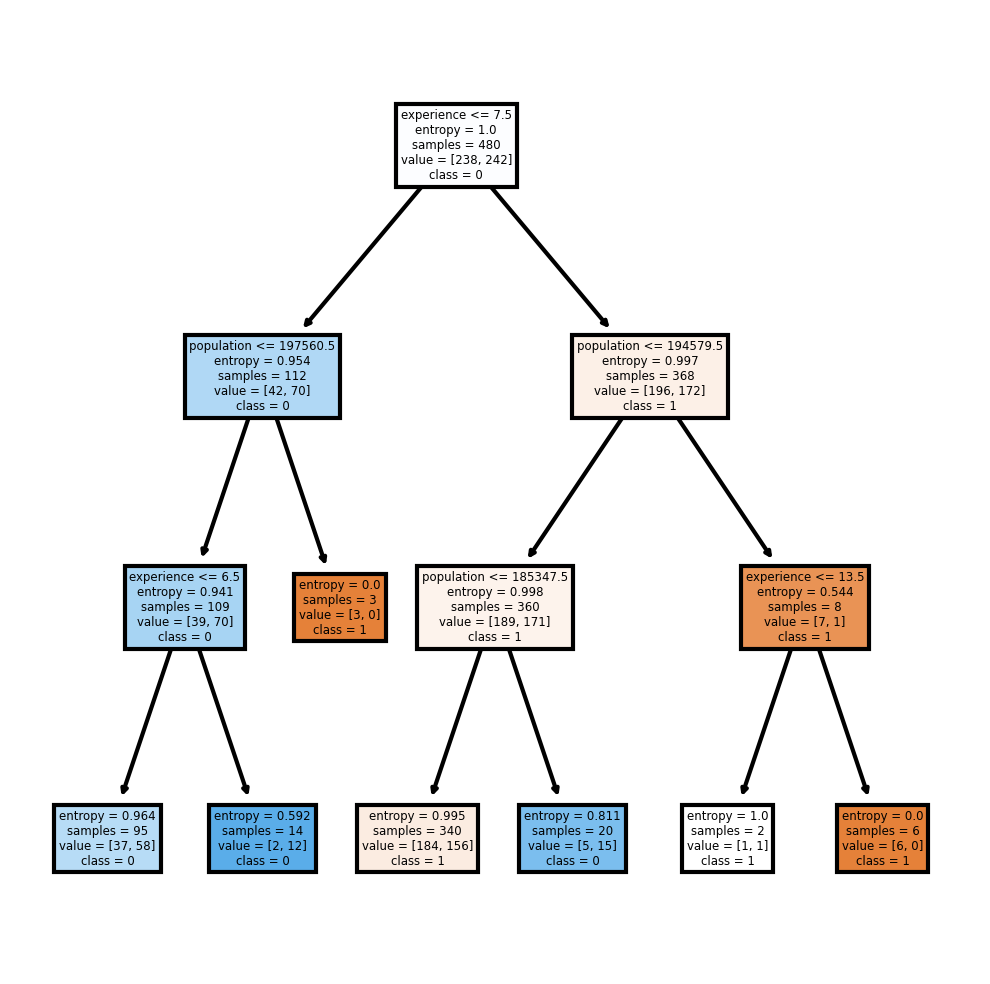

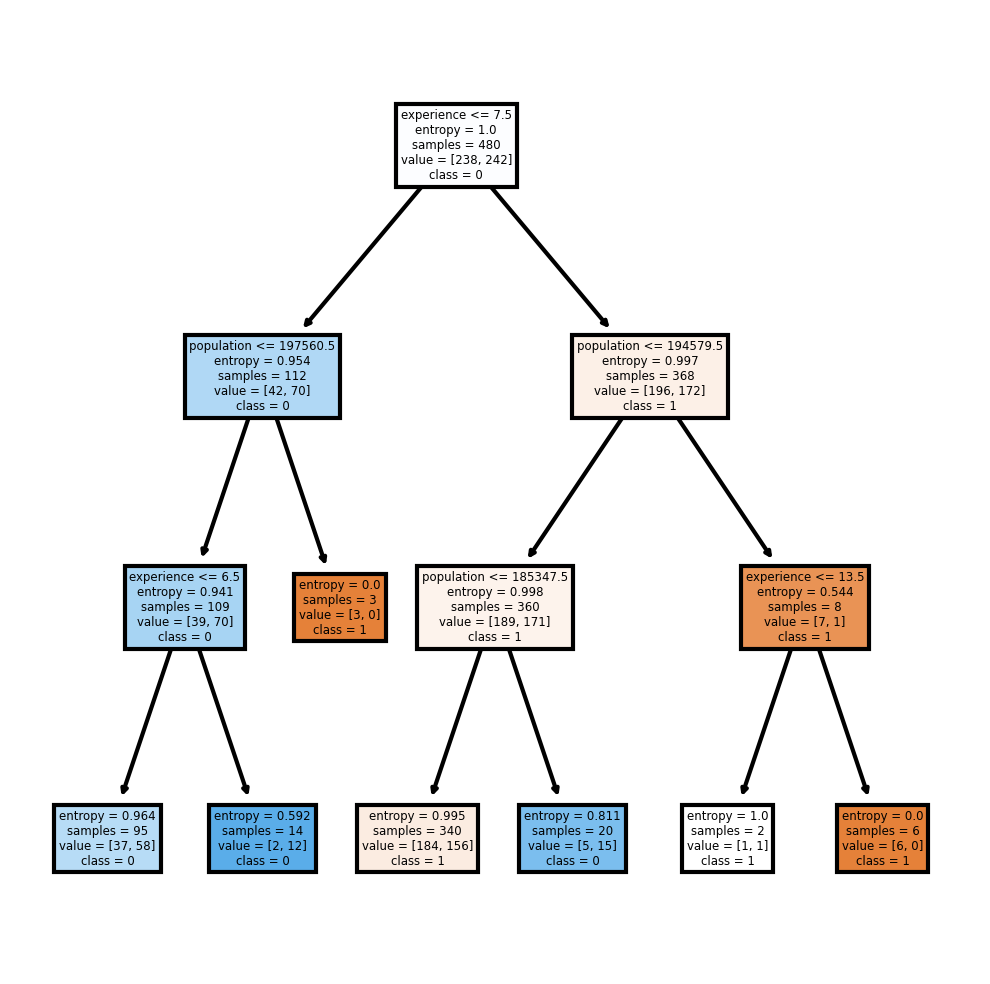

In [53]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.show()


In [54]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()


0    92
1    28
dtype: int64

In [55]:
preds


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=uint8)

In [56]:
pd.crosstab(y_test,preds)


col_0       0   1
Urban_YES        
0          46  14
1          46  14

In [57]:
np.mean(preds==y_test)

0.5

In [58]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)


In [59]:
model_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [60]:
pred=model.predict(x_test)
np.mean(preds==y_test)


0.5

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
array = fraud.values
X = array[:,0:3]
y = array[:,3]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [65]:
model.score(X_test,y_test)


-0.9624533582089554

# Company data

In [67]:
import pandas as pd
import numpy as np

In [68]:
df=pd.read_csv("Company_Data.csv")

In [69]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [70]:
df.shape

(400, 11)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [72]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [73]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


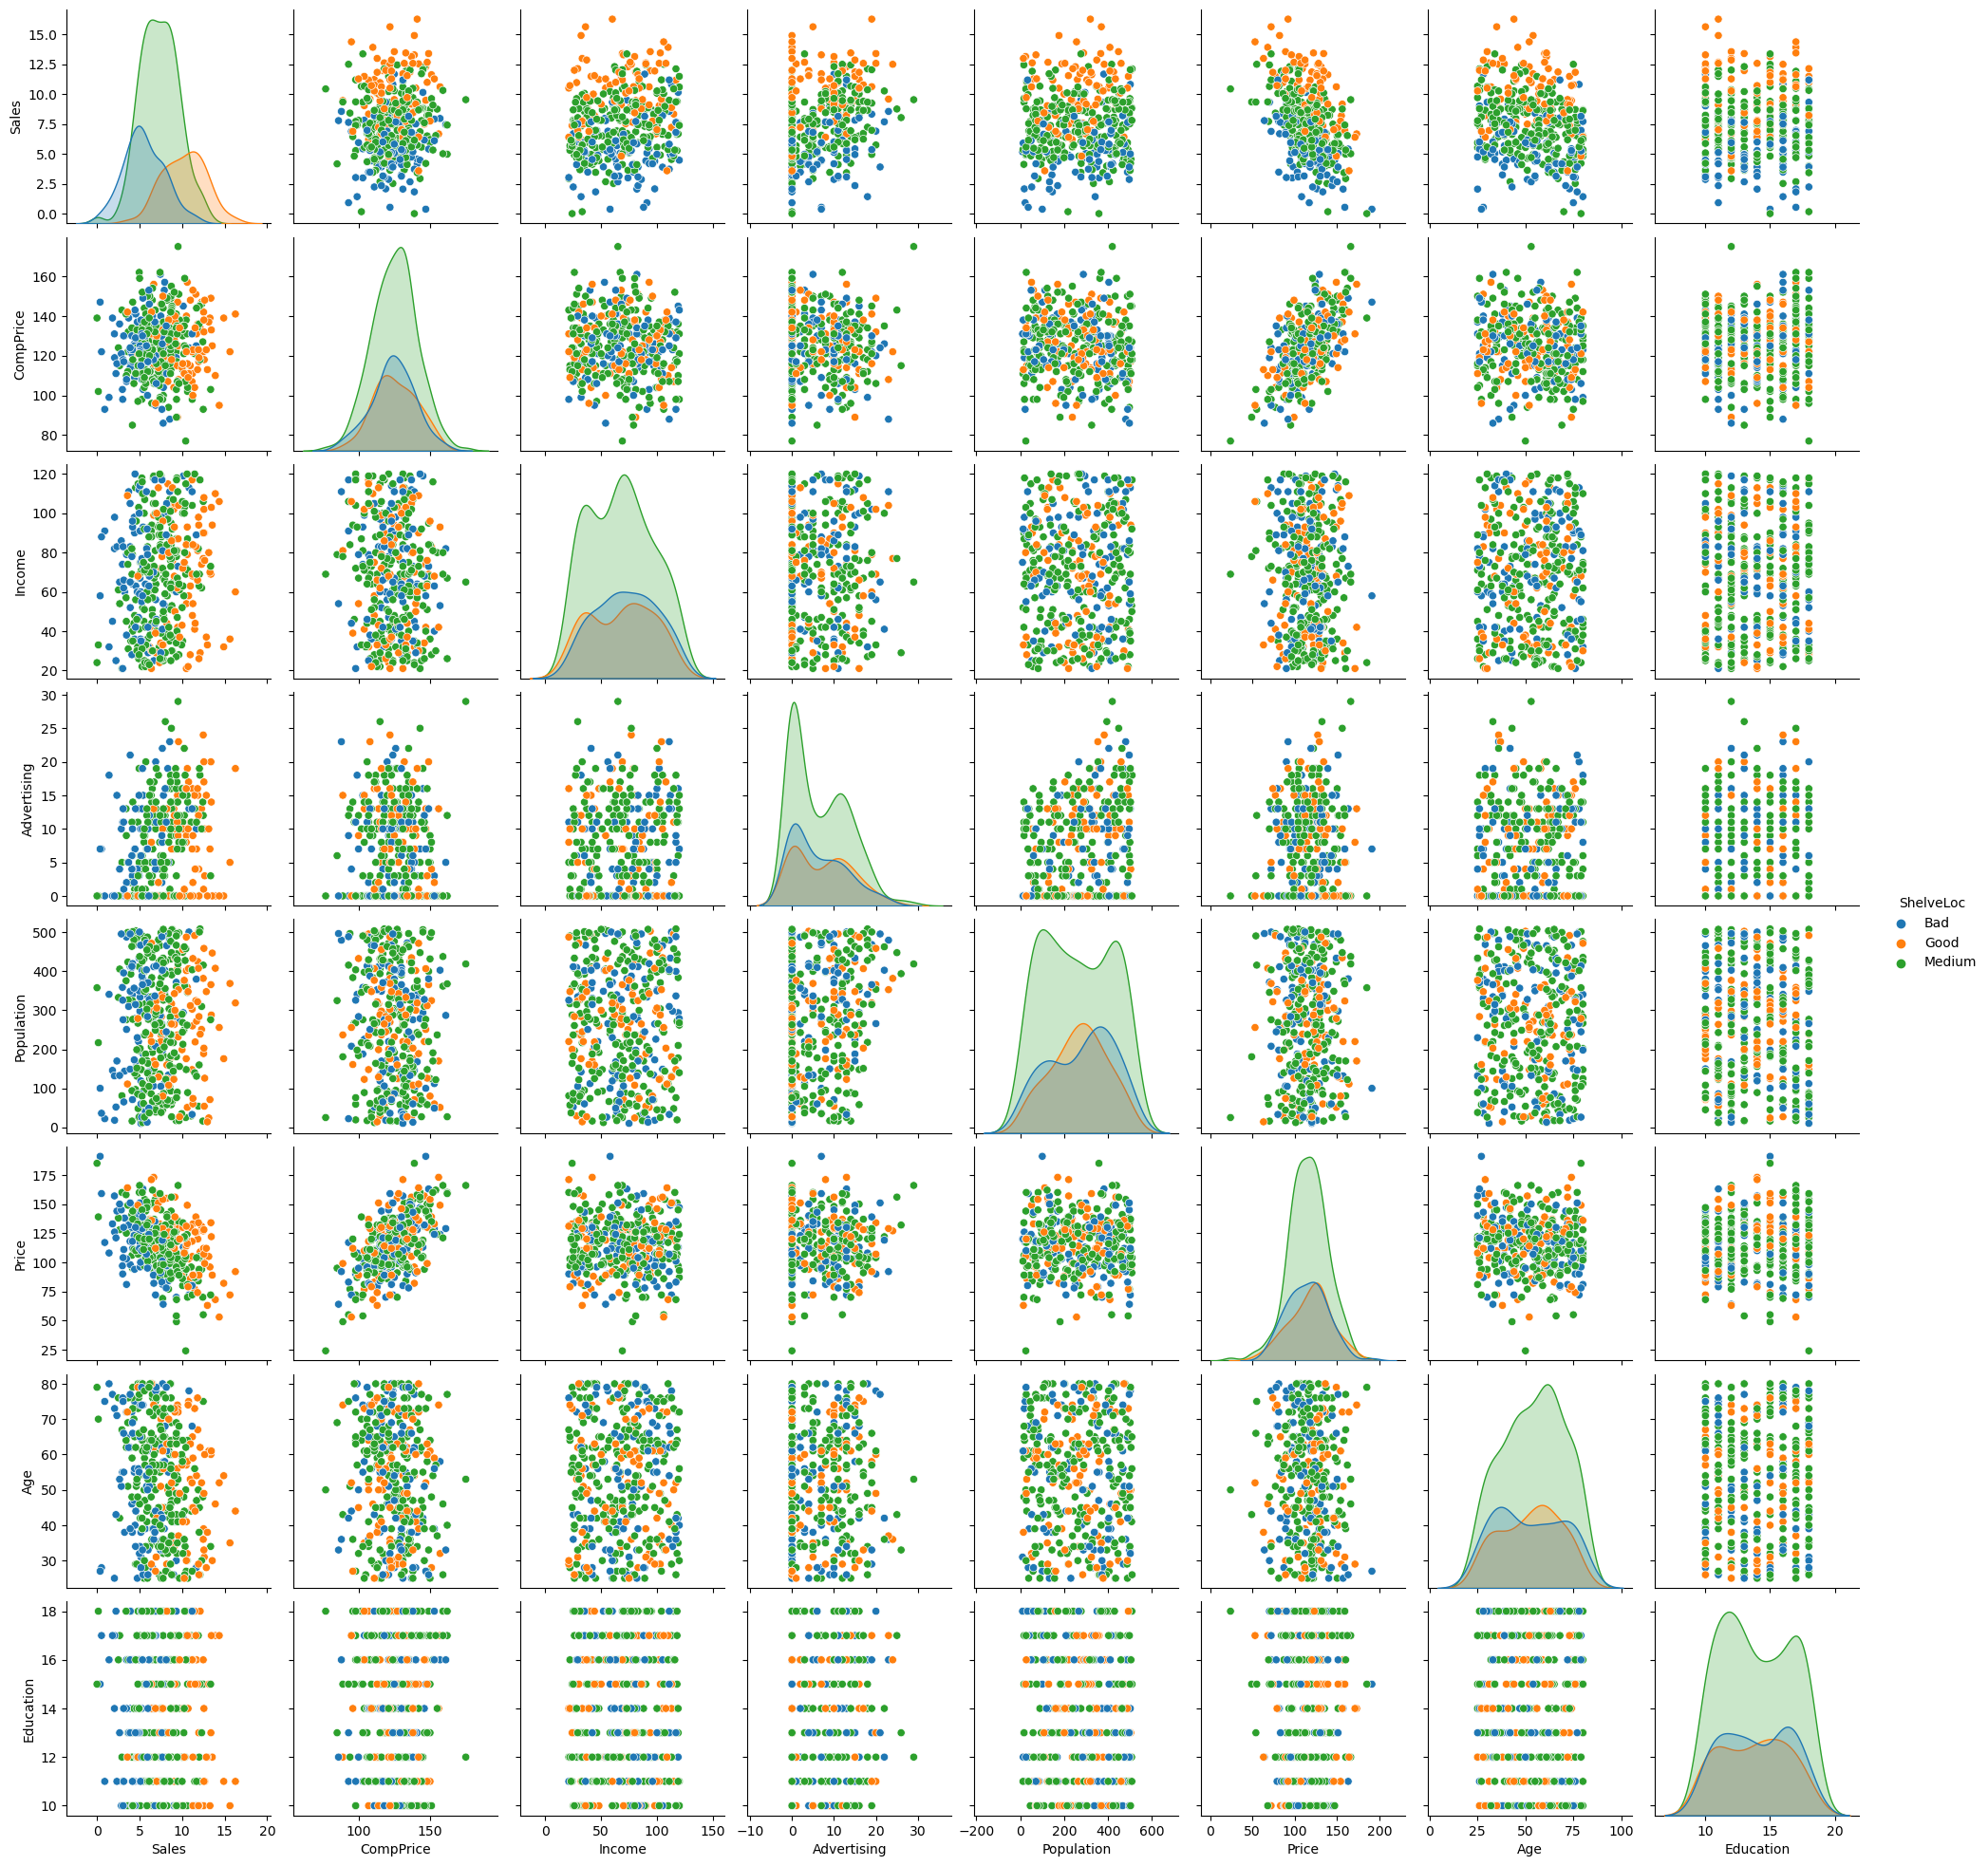

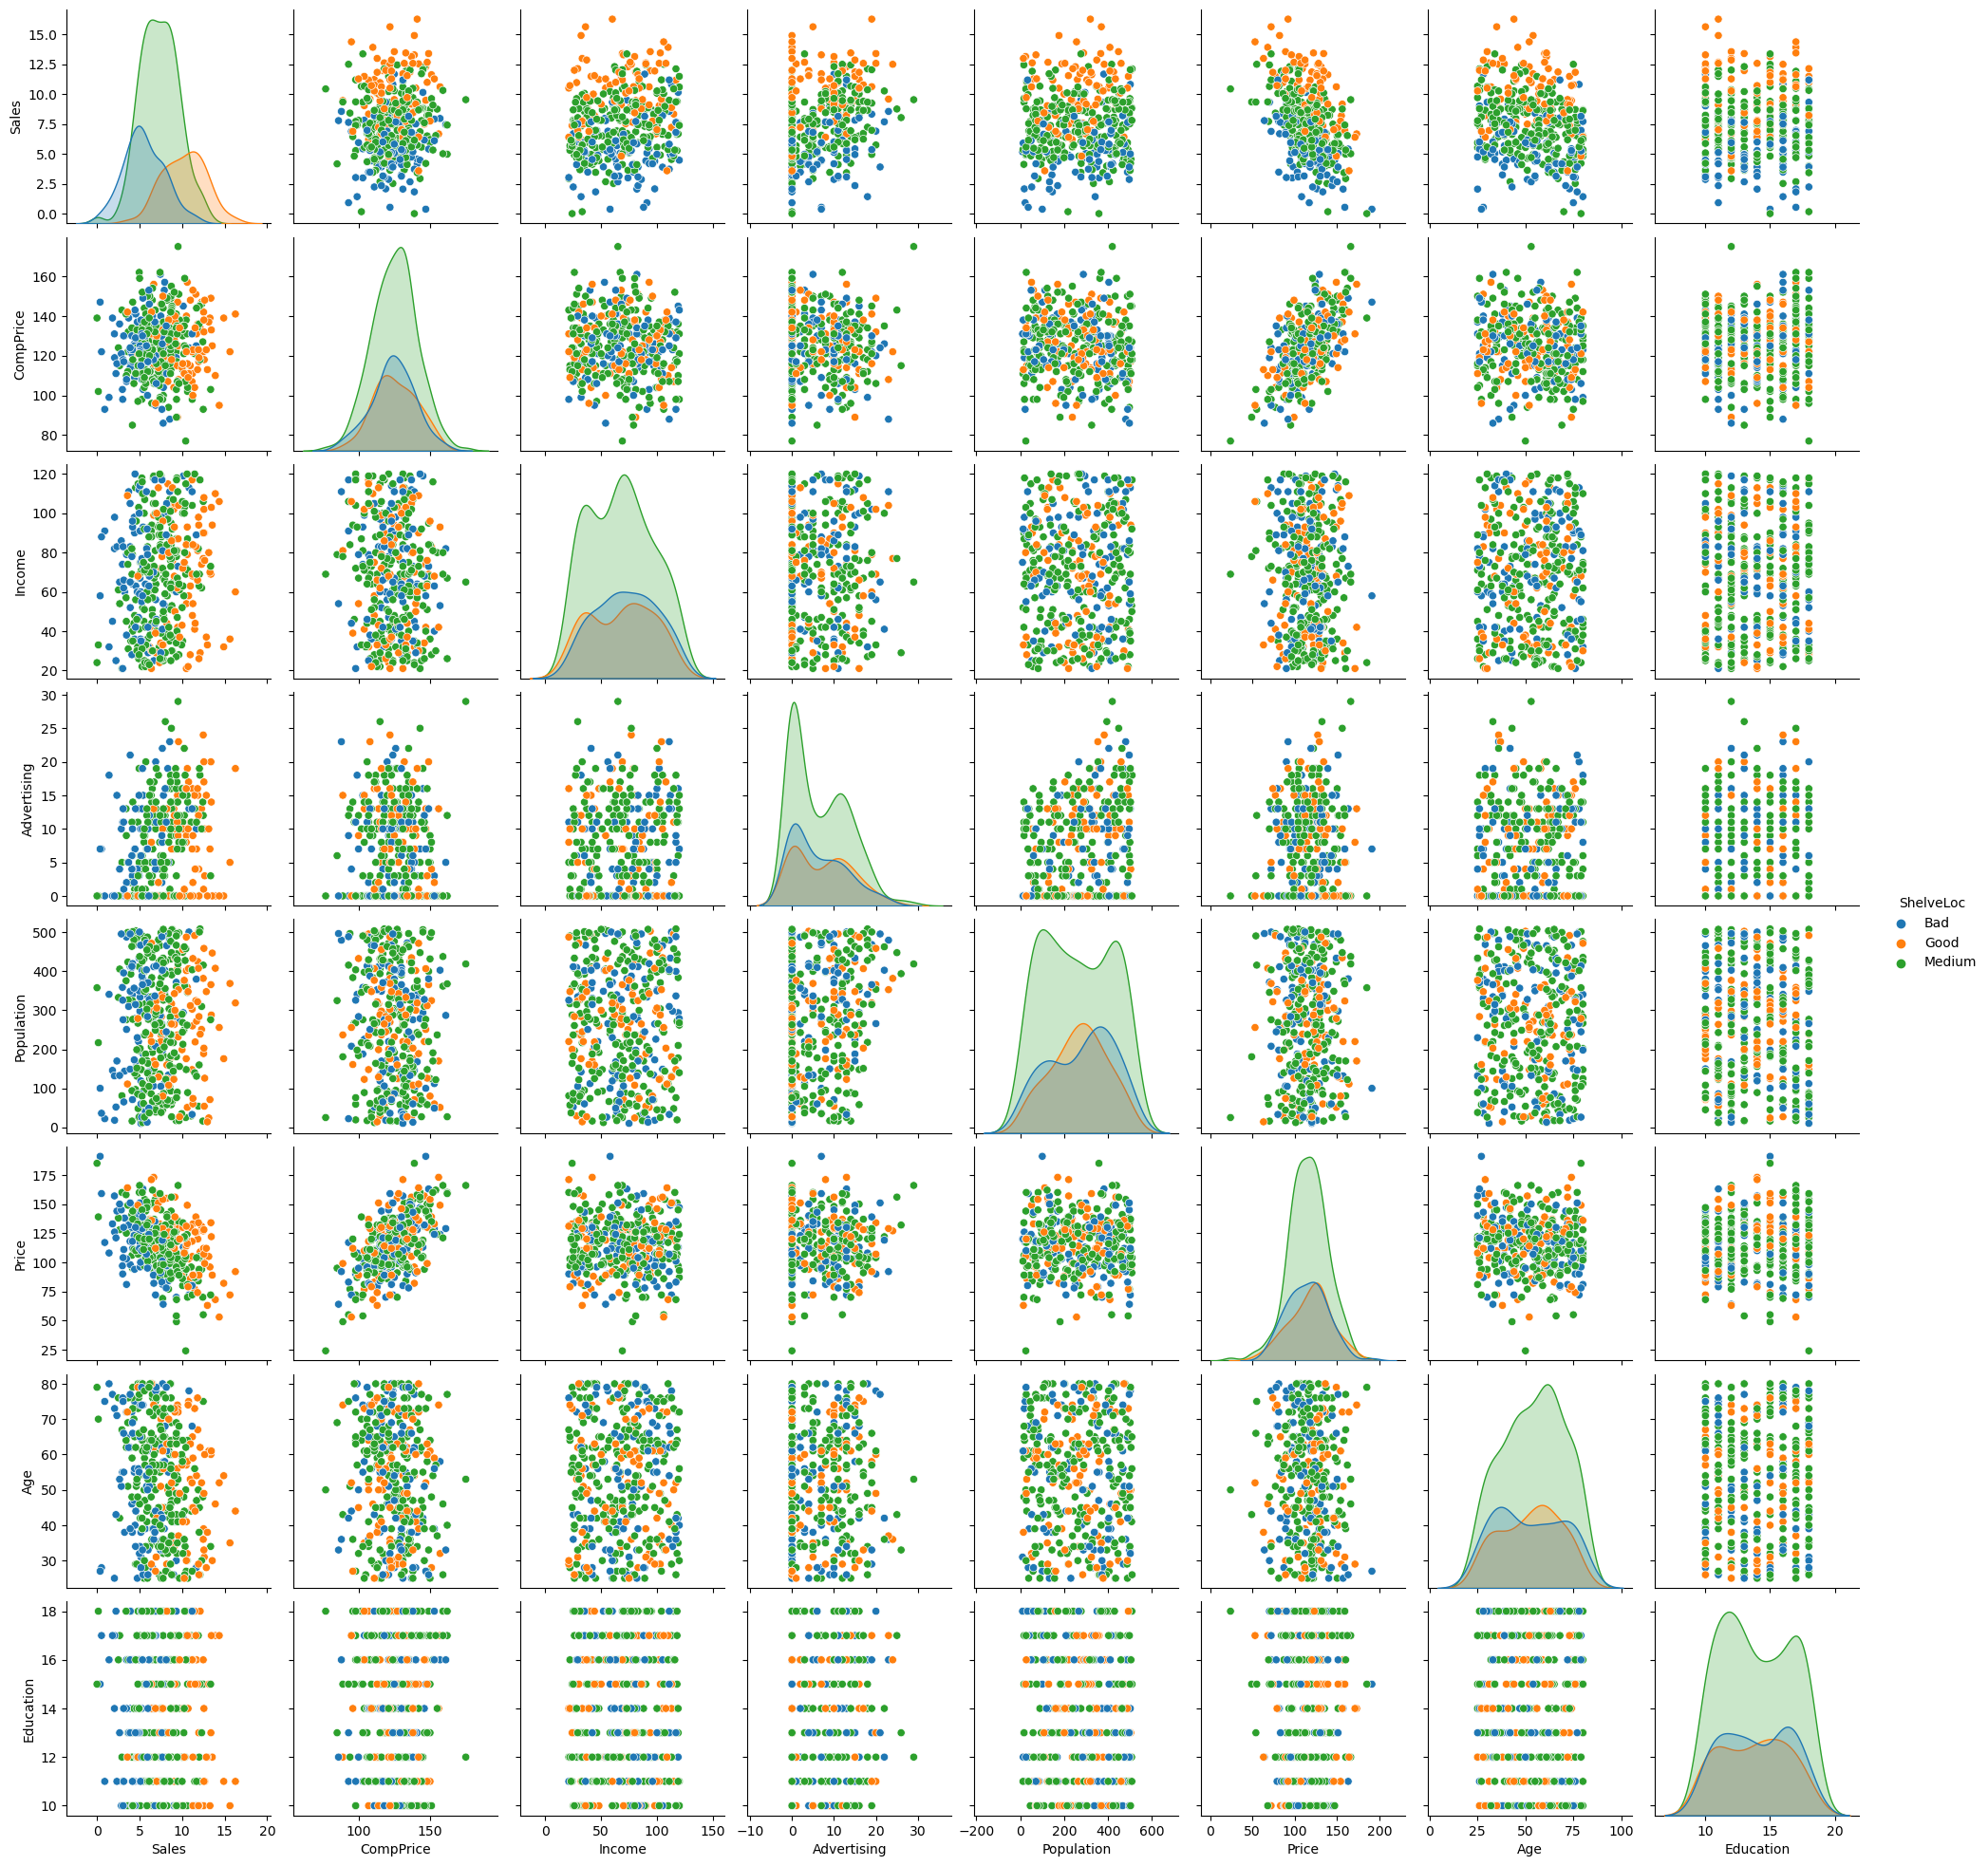

In [76]:
sns.pairplot(data=df, hue = 'ShelveLoc')
plt.show()


In [81]:
df["Sales"] = pd.cut(df["Sales"], bins=[0,4.2,8.01,12.01,16.27],labels=["poor","good","very good","excellent"])
df


Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  \
0    very good        138      73           11         276    120       Bad   
1    very good        111      48           16         260     83      Good   
2    very good        113      35           10         269     80    Medium   
3         good        117     100            4         466     97    Medium   
4         poor        141      64            3         340    128       Bad   
..         ...        ...     ...          ...         ...    ...       ...   
395  excellent        138     108           17         203    128      Good   
396       good        139      23            3          37    120    Medium   
397       good        162      26           12         368    159    Medium   
398       good        100      79            7         284     95       Bad   
399  very good        134      37            0          27    120      Good   

     Age  Education Urban   US  
0     42         17   Yes  Yes  
1     65         10   Yes  Yes  
2     59         12   Yes  Yes  
3     55         14   Yes  Yes  
4     38         13   Yes   No  
..   ...        ...   ...  ...  
395   33         14   Yes  Yes  
396   55         11    No  Yes  
397   40         18   Yes  Yes  
398   50         12   Yes  Yes  
399   49         16   Yes  Yes  

[400 rows x 11 columns]

In [82]:
Y=df["Sales"]
X=df.iloc[:,1:]

In [83]:
X.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [84]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()

In [85]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()


In [88]:
X["CompPrice"]=MM.fit_transform(X[["CompPrice"]])
X["Income"]=MM.fit_transform(X[["Income"]])

X["Advertising"]=MM.fit_transform(X[["Advertising"]])

X["Population"]=MM.fit_transform(X[["Population"]])

X["Price"]=MM.fit_transform(X[["Price"]])

X["Age"]=MM.fit_transform(X[["Age"]])

X["Education"]=MM.fit_transform(X[["Education"]])



In [89]:
X["ShelveLoc"]=LE.fit_transform(X["ShelveLoc"])
X["ShelveLoc"]=pd.DataFrame(X["ShelveLoc"])

In [90]:
X["Urban"]=LE.fit_transform(X["Urban"])
X["Urban"]=pd.DataFrame(X["Urban"])


In [91]:
X["US"]=LE.fit_transform(X["US"])
X["US"]=pd.DataFrame(X["US"])
X


CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     0.622449  0.525253     0.379310    0.533066  0.574850          0   
1     0.346939  0.272727     0.551724    0.501002  0.353293          1   
2     0.367347  0.141414     0.344828    0.519038  0.335329          2   
3     0.408163  0.797980     0.137931    0.913828  0.437126          2   
4     0.653061  0.434343     0.103448    0.661323  0.622754          0   
..         ...       ...          ...         ...       ...        ...   
395   0.622449  0.878788     0.586207    0.386774  0.622754          1   
396   0.632653  0.020202     0.103448    0.054108  0.574850          2   
397   0.867347  0.050505     0.413793    0.717435  0.808383          2   
398   0.234694  0.585859     0.241379    0.549098  0.425150          0   
399   0.581633  0.161616     0.000000    0.034068  0.574850          1   

          Age  Education  Urban  US  
0    0.309091      0.875      1   1  
1    0.727273      0.000      1   1  
2    0.618182      0.250      1   1  
3    0.545455      0.500      1   1  
4    0.236364      0.375      1   0  
..        ...        ...    ...  ..  
395  0.145455      0.500      1   1  
396  0.545455      0.125      0   1  
397  0.272727      1.000      1   1  
398  0.454545      0.250      1   1  
399  0.436364      0.750      1   1  

[400 rows x 10 columns]

In [92]:
Y=LE.fit_transform(df["Sales"])
Y=pd.DataFrame(Y)


In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)


In [94]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_depth=6,max_leaf_nodes=20)
RF.fit(X_train,Y_train)
Y_predtrain=RF.predict(X_train)
Y_predtest=RF.predict(X_test)

C:\Users\UMAPATHY\AppData\Local\Temp\ipykernel_15084\4207159319.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,Y_train)


In [95]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_predtrain)
print("accuracy_score1: ", ac1)


accuracy_score1:  0.8416666666666667


In [96]:
ac2=accuracy_score(Y_test,Y_predtest)
print("accuracy_score2: ", ac2)


accuracy_score2:  0.5375


In [97]:
from sklearn.ensemble import BaggingClassifier
RF=RandomForestClassifier(max_depth=5)
Bag=BaggingClassifier(base_estimator=RF,max_samples=0.6,n_estimators=100)
Bag.fit(X_train,Y_train)                     
Y_predtrain=Bag.predict(X_train)
Y_predtest=Bag.predict(X_test)


C:\Users\UMAPATHY\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_predtrain)
print("accuracy_score1: ", ac1)


accuracy_score1:  0.7583333333333333


In [99]:
ac2=accuracy_score(Y_test,Y_predtest)
print("accuracy_score1: ", ac2)


accuracy_score1:  0.55


In [100]:
Training_accuracy = []
Test_accuracy = []

In [101]:
for i in range(1,12):
    regressor = RandomForestClassifier(max_depth=i,criterion="entropy") 
    regressor.fit(X_train,Y_train)
    Y_pred_train = regressor.predict(X_train)
    Y_pred_test = regressor.predict(X_test)
    Training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    Test_accuracy.append(accuracy_score(Y_test,Y_pred_test))


C:\Users\UMAPATHY\AppData\Local\Temp\ipykernel_15084\3916246305.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,Y_train)
C:\Users\UMAPATHY\AppData\Local\Temp\ipykernel_15084\3916246305.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,Y_train)
C:\Users\UMAPATHY\AppData\Local\Temp\ipykernel_15084\3916246305.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,Y_train)
C:\Users\UMAPATHY\AppData\Local\Temp\ipykernel_15084\3916246305.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

In [102]:
pd.DataFrame(Training_accuracy)
pd.DataFrame(Test_accuracy)
pd.concat([pd.DataFrame(range(1,12)) ,pd.DataFrame(Training_accuracy),pd.DataFrame(Test_accuracy)],axis=1)    


0         0        0
0    1  0.491667  0.46250
1    2  0.600000  0.53750
2    3  0.691667  0.57500
3    4  0.762500  0.55625
4    5  0.870833  0.53750
5    6  0.966667  0.56250
6    7  0.991667  0.56875
7    8  1.000000  0.55625
8    9  1.000000  0.57500
9   10  1.000000  0.56875
10  11  1.000000  0.56875

In [103]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(max_depth=7,max_leaf_nodes=20)
RF.fit(X_train,Y_train)
Y_predtrain=RF.predict(X_train)
Y_predtest=RF.predict(X_test)


C:\Users\UMAPATHY\AppData\Local\Temp\ipykernel_15084\3382885822.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,Y_train)


In [104]:
from sklearn.metrics import r2_score
rs1=r2_score(Y_train,Y_predtrain)
print("r2_score1: ", rs1)
rs2=r2_score(Y_test,Y_predtest)
print("r2_score2: ", rs2)


r2_score1:  0.6148219631415188
r2_score2:  -0.11808044424041464


In [ ]:
from sklearn.ensemble import BaggingRegressor
RF=RandomForestRegressor(max_depth=7)
Bag=BaggingRegressor(base_estimator=RF,max_samples=0.6,n_estimators=100)
Bag.fit(X_train,Y_train)                     
Y_predtrain=Bag.predict(X_train)
Y_predtest=Bag.predict(X_test)


C:\Users\UMAPATHY\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import r2_score
rs1=r2_score(Y_train,Y_predtrain)
print("r2_score1: ", rs1)
rs2=r2_score(Y_test,Y_predtest)
print("r2_score1: ", rs2)
